# data prep

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/diabetes.csv")

# delete broken data
df = df.dropna(how='any',axis=0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
OUTPUT_KEY = "Outcome"

X = df.drop(OUTPUT_KEY, axis=1).values
y = df[OUTPUT_KEY].values

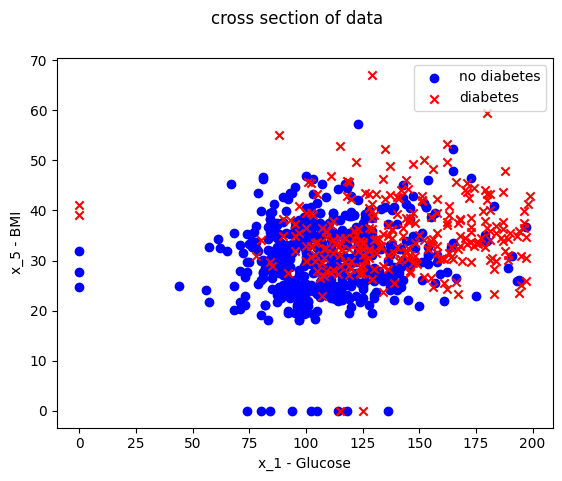

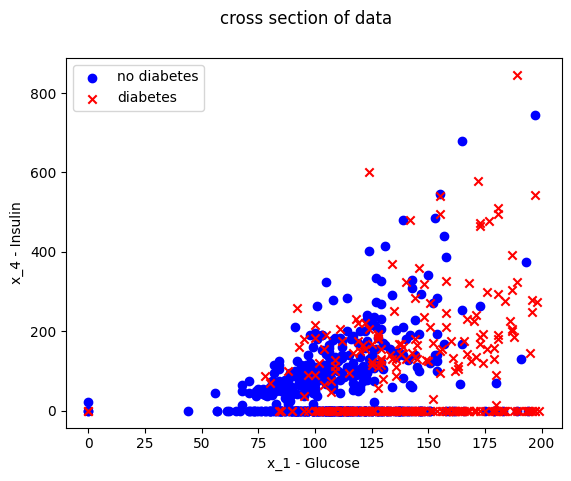

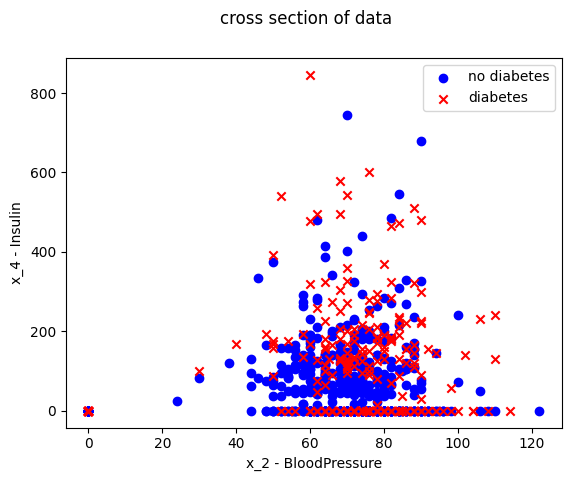

In [4]:
import matplotlib.pyplot as plt

def visualize(i1, i2):
    X1 = X[:, i1]
    X2 = X[:, i2]

    # visualization
    fig, axs = plt.subplots(1, 1)
    fig.suptitle(f'cross section of data')
    points1 = axs.scatter(X1[y==0], X2[y==0], c="b", marker="o")
    points2 = axs.scatter(X1[y==1], X2[y==1], c="r", marker="x")
    points1.set_label('no diabetes')
    points2.set_label('diabetes')
    axs.legend()
    axs.set(xlabel=f'x_{i1} - {df.columns.values[i1]}', ylabel=f'x_{i2} - {df.columns.values[i2]}')

visualize(1, 5)
visualize(1, 4)
visualize(2, 4)

# skewed dataset check

In [5]:
print(X[y==0].shape[0], X[y==1].shape[0])

500 268


looks like its a bit uneven

# splitting

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train

array([[  9.   , 145.   ,  80.   , ...,  37.9  ,   0.637,  40.   ],
       [ 10.   , 129.   ,  62.   , ...,  41.2  ,   0.441,  38.   ],
       [  7.   , 102.   ,  74.   , ...,  37.2  ,   0.204,  45.   ],
       ...,
       [ 13.   , 126.   ,  90.   , ...,  43.4  ,   0.583,  42.   ],
       [  4.   , 171.   ,  72.   , ...,  43.6  ,   0.479,  26.   ],
       [  9.   , 102.   ,  76.   , ...,  32.9  ,   0.665,  46.   ]])

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="default")
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [8]:
scaled_X_test

array([[ 0.98334907,  0.49936361,  0.22137443, ..., -0.754147  ,
         0.41446124,  1.55648438],
       [-0.83752176,  0.95190575, -0.56882966, ..., -0.74277424,
        -0.94288191, -0.95299549],
       [ 0.6798706 , -0.31521226, -0.56882966, ..., -0.86787462,
        -0.86457365, -0.52032655],
       ...,
       [ 1.28682754,  2.06817638,  0.44714703, ...,  1.73648772,
        -1.06469476,  0.86421407],
       [ 0.37639213,  0.49936361,  0.67291962, ..., -3.71106494,
         0.3941591 ,  3.11409258],
       [ 0.07291366, -0.88843231, -3.95541862, ..., -0.52669178,
         0.30714993, -0.17419139]])

# model

In [9]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5)],
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

model.fit(scaled_X_train, y_train, epochs=100)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.5720 - loss: 0.6776
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6873 - loss: 0.5943 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7368 - loss: 0.5220 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7409 - loss: 0.4976 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7909 - loss: 0.4723 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7772 - loss: 0.4854 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7926 - loss: 0.4385 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8069 - loss: 0.4233 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7847 - loss: 0.4285 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7660 - loss: 0.4565 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy:

In [10]:
model.evaluate(scaled_X_train, y_train, return_dict=True)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9804 - loss: 0.0940  


{'binary_accuracy': 0.9788273572921753, 'loss': 0.1022946685552597}

In [11]:
model.evaluate(scaled_X_test, y_test, return_dict=True)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.7880 - loss: 0.7482 


{'binary_accuracy': 0.7792207598686218, 'loss': 0.8019424676895142}

looks like it's not doing well in terms of cross validation

# model 2: regularized

In [12]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)),
    tf.keras.layers.Dense(units=32, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)),
    tf.keras.layers.Dense(units=16, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5)],
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

model.fit(scaled_X_train, y_train, epochs=100)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.4685 - loss: 1.4764
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6801 - loss: 1.2733 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7020 - loss: 1.1476 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7305 - loss: 1.0413 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7424 - loss: 0.9705 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.7910 - loss: 0.8909 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7708 - loss: 0.8391 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7563 - loss: 0.8120 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.7883 - loss: 0.7548 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7817 - loss: 0.7252 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy:

In [13]:
model.evaluate(scaled_X_test, y_test, return_dict=True)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.8131 - loss: 0.4862  


{'binary_accuracy': 0.8246753215789795, 'loss': 0.5089691281318665}

# predictions

In [14]:
y_pred = model.predict(scaled_X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [15]:
y_pred

array([[0.49575335],
       [0.38760725],
       [0.13590547],
       [0.05292391],
       [0.16459042],
       [0.20025037],
       [0.52199864],
       [0.07171258],
       [0.10127643],
       [0.10265461],
       [0.5444447 ],
       [0.1029974 ],
       [0.88789445],
       [0.69241273],
       [0.03159859],
       [0.6829399 ],
       [0.29107693],
       [0.42160815],
       [0.15804529],
       [0.18114842],
       [0.5361042 ],
       [0.18779233],
       [0.8753227 ],
       [0.24891706],
       [0.04031435],
       [0.46383297],
       [0.1732002 ],
       [0.85555446],
       [0.06080964],
       [0.5644313 ],
       [0.3734692 ],
       [0.507064  ],
       [0.04681341],
       [0.6439282 ],
       [0.13415079],
       [0.74500793],
       [0.05283868],
       [0.16803032],
       [0.09070775],
       [0.44247985],
       [0.132431  ],
       [0.04988556],
       [0.02648677],
       [0.3511905 ],
       [0.05393844],
       [0.02023198],
       [0.85481906],
       [0.833

In [16]:
y_pred = y_pred.T[0]

# choosing threshold

C:\Users\slotl\AppData\Local\Temp\ipykernel_16408\697181843.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


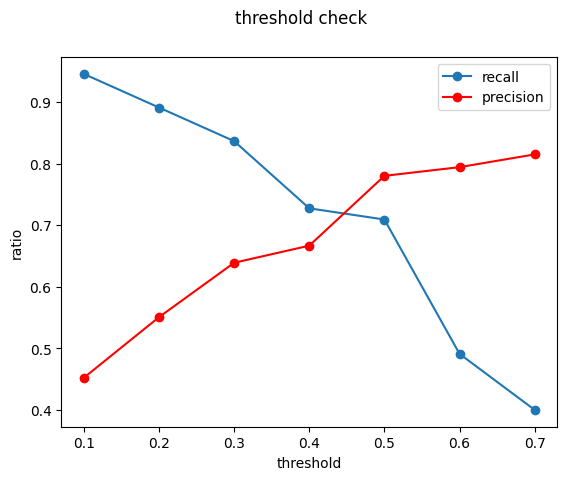

In [17]:
THRESHOLD_RANGE = np.arange(0.1, 0.8, 0.1)
recall = []
precision = []

for THRESHOLD in THRESHOLD_RANGE:
    new_pred = y_pred >= THRESHOLD
    recall.append(y_test[np.logical_and(new_pred == y_test, y_test == 1)].shape[0]/y_test[y_test==1].shape[0])
    precision.append(y_test[np.logical_and(new_pred == y_test, y_test == 1)].shape[0]/new_pred[new_pred==1].shape[0])


fig, axs = plt.subplots(1, 1)
fig.suptitle(f'threshold check')
l1 = axs.plot(THRESHOLD_RANGE, recall, marker='o', label="recall")
l2 = axs.plot(THRESHOLD_RANGE, precision, marker='o', c="r", label="precision")
axs.legend()
axs.set(xlabel='threshold', ylabel='ratio')
fig.show()

0.2 is probably optimal for diabetes detection

In [18]:
CHOSEN_THRESHOLD = 0.2

# training approach 2: logistic regression
- for linear proportionalities between feature and output
- easier to understand 

In [19]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=1)
logreg.fit(scaled_X_train, y_train)

LogisticRegression(random_state=1)

In [20]:
y_pred_logreg = logreg.predict(scaled_X_test)
y_pred_logreg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [28]:
print("precision:", y_test[np.logical_and(y_pred_logreg == y_test, y_test == 1)].shape[0]/y_test[y_test==1].shape[0])
print("recall:", y_test[np.logical_and(y_pred_logreg == y_test, y_test == 1)].shape[0]/y_pred_logreg[y_pred_logreg==1].shape[0])

precision: 0.5636363636363636
recall: 0.7560975609756098


unfortunately not better - probably due to the fact that non-linearity is present in the correlation in diabetes detection

# extra: some visualization

In [22]:
y_pred = np.where(y_pred >= CHOSEN_THRESHOLD, 1, 0)

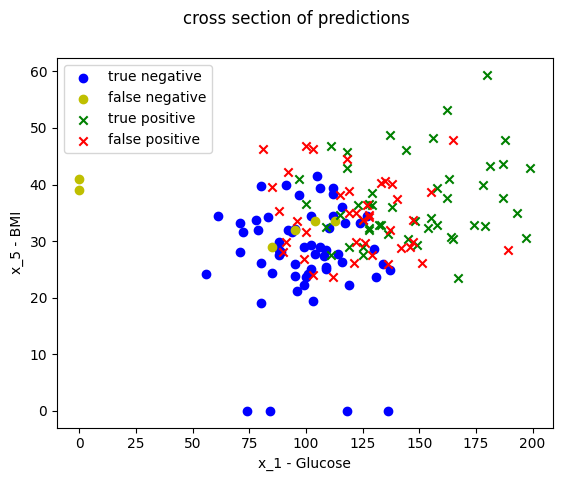

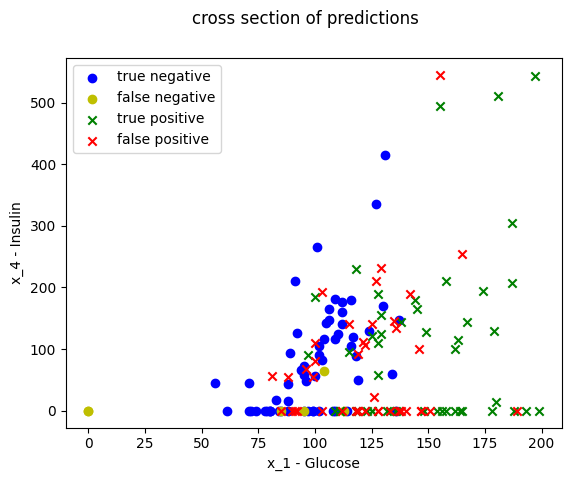

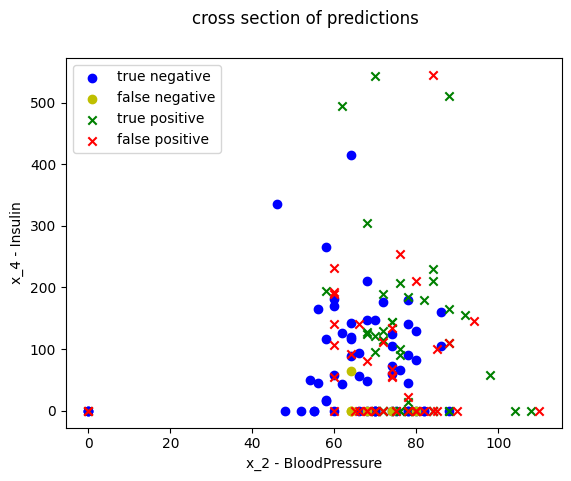

In [23]:
import matplotlib.pyplot as plt

def visualize_prediction(i1, i2):
    X1 = X_test[:, i1]
    X2 = X_test[:, i2]

    # visualization
    fig, axs = plt.subplots(1, 1)
    fig.suptitle(f'cross section of predictions')
    tn = axs.scatter(X1[np.logical_and(y_pred==0, y_test==y_pred)], X2[np.logical_and(y_pred==0, y_test==y_pred)], c="b", marker="o")
    fn = axs.scatter(X1[np.logical_and(y_pred==0, y_test!=y_pred)], X2[np.logical_and(y_pred==0, y_test!=y_pred)], c="y", marker="o")
    tp = axs.scatter(X1[np.logical_and(y_pred==1, y_test==y_pred)], X2[np.logical_and(y_pred==1, y_test==y_pred)], c="g", marker="x")
    fp = axs.scatter(X1[np.logical_and(y_pred==1, y_test!=y_pred)], X2[np.logical_and(y_pred==1, y_test!=y_pred)], c="r", marker="x")
    tn.set_label('true negative')
    fn.set_label('false negative')
    tp.set_label('true positive')
    fp.set_label('false positive')
    axs.legend()
    axs.set(xlabel=f'x_{i1} - {df.columns.values[i1]}', ylabel=f'x_{i2} - {df.columns.values[i2]}')

visualize_prediction(1, 5)
visualize_prediction(1, 4)
visualize_prediction(2, 4)

not a lot of false negatives, which is excellent